In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv("../data/raw/iris.m", header=None)

In [41]:
X = df.iloc[:, 0:4].values
y = df.iloc[:, -1].values

In [42]:
X = np.hstack([X, np.ones((len(X), 1))])  # adiciona bias
d = X.shape[1]  # quantidade de features
k = len(np.unique(y))  # quantidade de classes

In [43]:
# prepara o Y para multiclasse
unique_classes = list(np.unique(y))
Ytr = np.zeros((len(X), k))

for i, yi in enumerate(y):
    classindex = unique_classes.index(yi)
    Ytr[i][classindex] = 1

---

## Softmax regression

In [150]:
def softmax(Ŷ):
    Ŷ = (Ŷ.T - np.amax(Ŷ, axis=1)).T
    expY = np.exp(Ŷ)
    return  expY / np.sum(expY, axis=1).reshape(150, 1)

def cross_entropy(Ytr, Ŷ):
    return -np.sum(np.multiply(Ytr, np.log(Ŷ)))

In [151]:
def h(X, W, grad, alpha):
    Wi = W + alpha * (-grad)
    Ŷi = softmax(X @ Wi.T)
    return Ŷi

In [152]:
def hl(X, W, grad, alpha):
    Ŷ = h(X, W, grad, alpha)
    grad_h = (Ŷ - Ytr).T @ X
    return np.dot(grad_h.flatten().T, (-grad).flatten())

In [153]:
def bissecao(X, W, grad):
    
    al = 0  # isso vai ser sempre negativo
    ar = np.random.rand()  # pode ou não ser positivo
    
    while hl(X, W, grad, ar) < 0:
        ar = 2*ar
    
    am = (al + ar) / 2
    
    hlinha = hl(X, W, grad, am)
    
    while abs(hlinha) > 1e-4:
        
        if hlinha > 0:
            ar = am
        elif hlinha < 0:
            al = am
        else:
            return am
        
        am = (al + ar) / 2
        hlinha = hl(X, W, grad, am)

    return am

In [169]:
W = np.random.rand(k, d)
Ŷ = softmax(X @ W.T)
cross_entropy(Ytr, Ŷ)
grad = (Ŷ - Ytr).T @ X

In [170]:
loss_values = []

In [171]:
grad_norm = np.linalg.norm(grad.flatten())

it = 0
while grad_norm > 1e-3 and it < 1000:
    alpha = bissecao(X, W, grad)
    W = W - alpha * grad
    Ŷ = softmax(X @ W.T)
    grad = (Ŷ - Ytr).T @ X
    grad_norm  = np.linalg.norm(grad.flatten())

    loss = cross_entropy(Ytr, Ŷ)
    loss_values.append(loss)

    it += 1
    print(f"it: {it}, grad_norm: {grad_norm}, cross_entropy: {loss}")

it: 1, grad_norm: 99.1158544617756, cross_entropy: 135.19953724969355
it: 2, grad_norm: 236.36160257657065, cross_entropy: 120.2954681068907
it: 3, grad_norm: 78.18480812704739, cross_entropy: 109.46213901890629
it: 4, grad_norm: 122.39222881312524, cross_entropy: 105.71613521297002
it: 5, grad_norm: 72.26670228840001, cross_entropy: 102.76449586088552
it: 6, grad_norm: 94.53263648334895, cross_entropy: 100.6802103312913
it: 7, grad_norm: 66.04375653018074, cross_entropy: 98.75784234008194
it: 8, grad_norm: 87.15535434124845, cross_entropy: 97.03151276499642
it: 9, grad_norm: 61.30802149270052, cross_entropy: 95.40732828173336
it: 10, grad_norm: 81.15259269745555, cross_entropy: 93.92460687610371
it: 11, grad_norm: 57.3054910252834, cross_entropy: 92.51786085972377
it: 12, grad_norm: 76.05207490827377, cross_entropy: 91.22413810044682
it: 13, grad_norm: 53.879144875671585, cross_entropy: 89.99018345283937
it: 14, grad_norm: 71.67257642196482, cross_entropy: 88.84771742817043
it: 15, gr

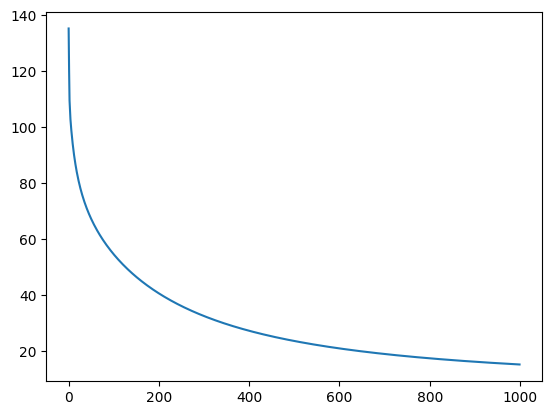

In [172]:
plt.plot(loss_values)